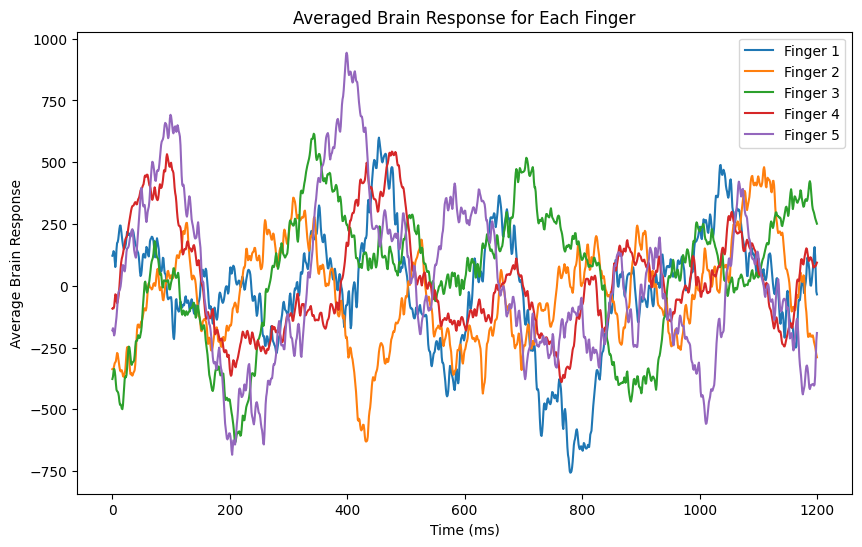

[[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-337.725      -338.28333333 -334.625      ... -263.21666667
  -278.08333333 -289.5       ]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points, ecog_data):
    # load the trial points with type int, and assign names for each column
    trial_points = pd.read_csv(trial_points, header=None, names=['Start', 'Peak', 'Finger'], dtype={'Start': int, 'Peak': int, 'Finger': int})
    # laod the ecog data, and assign name for the column
    ecog_data = pd.read_csv(ecog_data, header=None, names=['Signal'])
    
    # Define time window
    pre_start = 200  # 200 ms before the start
    post_start = 1000  # 1000 ms after the start
    window_size = pre_start + 1 + post_start  # Total 1201 indices
    
    unique_fingers = np.array([1, 2, 3, 4, 5]) # define an array with all fingers index
    fingers_erp_mean = np.zeros((len(unique_fingers), window_size)) # define a matrix size 5X1201
    
    # Iterate over each finger
    # Recive its events
    # Get the trials between the start and end indices
    # If found any, calculate the mean
    for i, finger in enumerate(unique_fingers):
        # take only the events related to the current finger in the loop
        finger_events = trial_points[trial_points['Finger'] == finger]
        all_trials = []
        
        for _, event in finger_events.iterrows():
            start_idx = event['Start'] - pre_start
            end_idx = event['Start'] + post_start + 1

            # ensure in valid range
            if start_idx >= 0 and end_idx <= len(ecog_data):
                # receives the ecog data between the start and end indices
                trial_signal = ecog_data['Signal'].iloc[start_idx:end_idx].values
                all_trials.append(trial_signal)
        
        # if found any trials - calculate the mean
        if all_trials:
            fingers_erp_mean[i, :] = np.mean(all_trials, axis=0)
    
    # Plot averaged brain response for each finger
    plt.figure(figsize=(10, 6))
    for i, finger in enumerate(unique_fingers):
        plt.plot(fingers_erp_mean[i, :], label=f'Finger {finger}')
    plt.xlabel('Time (ms)')
    plt.ylabel('Average Brain Response')
    plt.title('Averaged Brain Response for Each Finger')
    plt.legend()
    plt.show()
    
    # return the 5X1201 matrix
    return fingers_erp_mean

if __name__ == "__main__":
    trial_points = "events_file_ordered.csv"
    ecog_data = "brain_data_channel_one.csv"

    fingers_erp_mean = calc_mean_erp(trial_points, ecog_data)

    print(fingers_erp_mean)